In [1]:
import matplotlib.pyplot as plt
import maup
import numpy as np
from gerrychain import Graph, Partition
from MCMC import create_chain, walk, create_updaters


maup.progress.enabled = True

In [2]:
co_graph = Graph.from_file('./data/cleaned/final data/CO.shp')

In [3]:
initial_partition = Partition(
    co_graph,
    assignment='CD',
    updaters=create_updaters()
)

chain = create_chain(initial_partition, total_steps_in_run=20_000)

ensembles = walk(chain, num_dists=8)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [1:56:23<00:00,  2.86it/s]


In [4]:
len(ensembles)

13

In [5]:
cut_edge_ensemble, pres_16_df, pres_20_df, hispanic_df, dem_pres_16_ensemble, dem_pres_20_ensemble, white_ensemble, black_ensemble, hispanic_ensemble, native_ensemble, asian_ensemble, mm_ensemble, eg_ensemble = ensembles

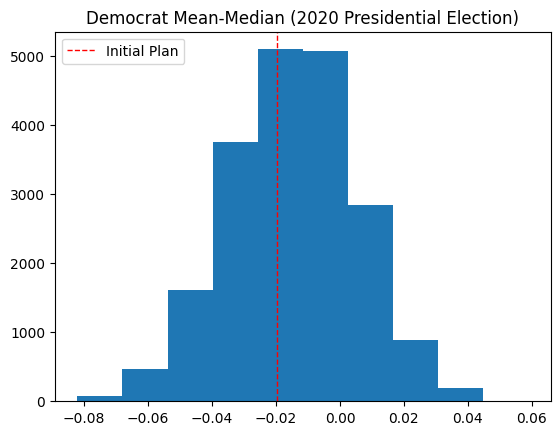

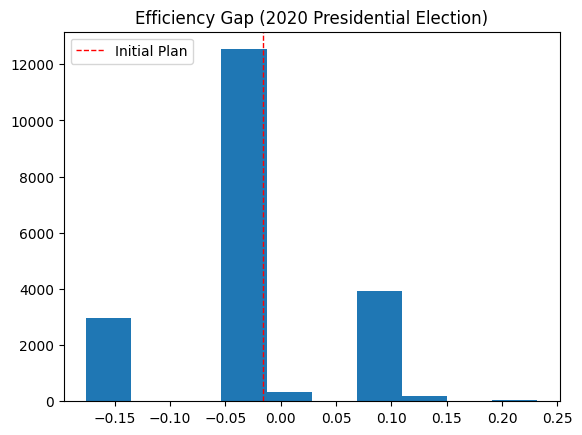

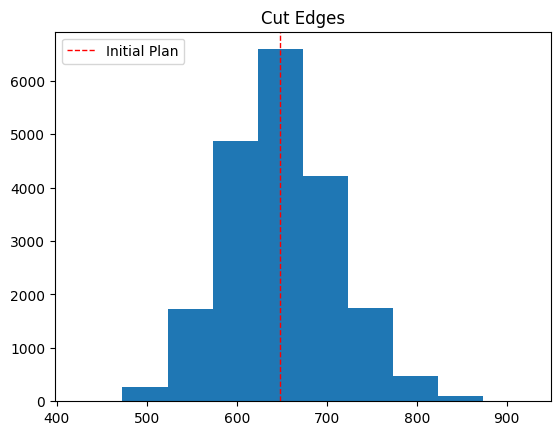

In [78]:
def create_stat_hist(ensemble, title):
    plt.figure()
    plt.title(title)
    plt.hist(ensemble, align='left')
    plt.axvline(ensemble[0], color='r', linestyle='dashed', linewidth=1, label='Initial Plan')
    plt.legend(loc="upper left")
    plt.savefig(f'{title}.png')

create_stat_hist(mm_ensemble, 'Democrat Mean-Median (2020 Presidential Election)')
create_stat_hist(eg_ensemble, 'Efficiency Gap (2020 Presidential Election)')

create_stat_hist(cut_edge_ensemble, 'Cut Edges')

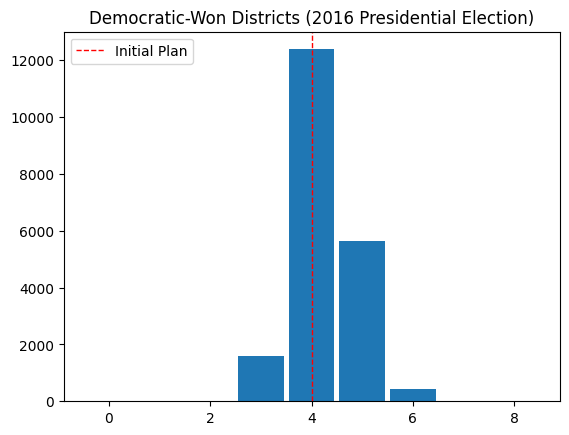

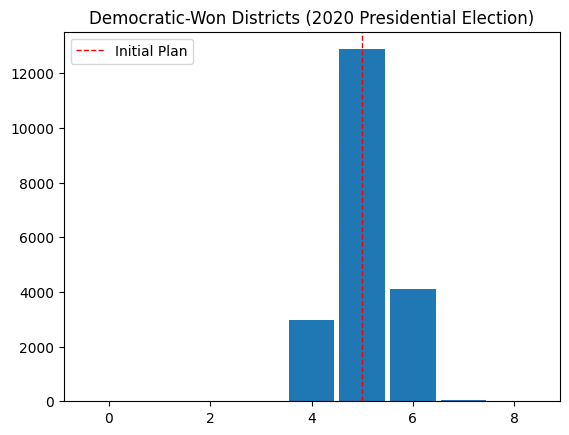

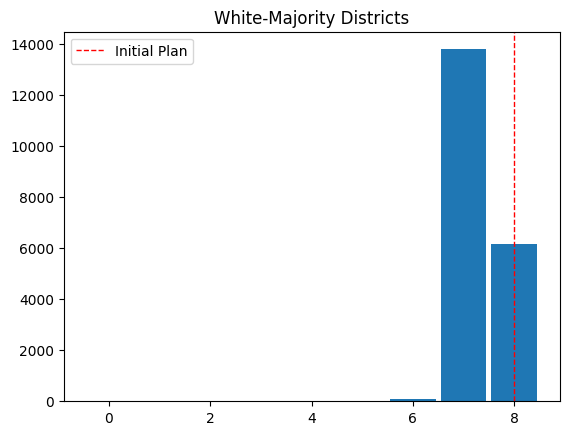

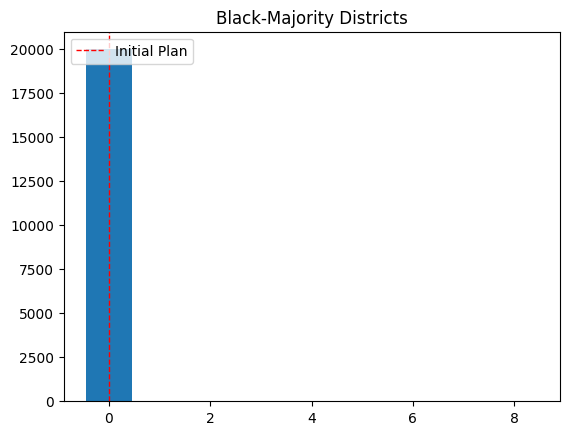

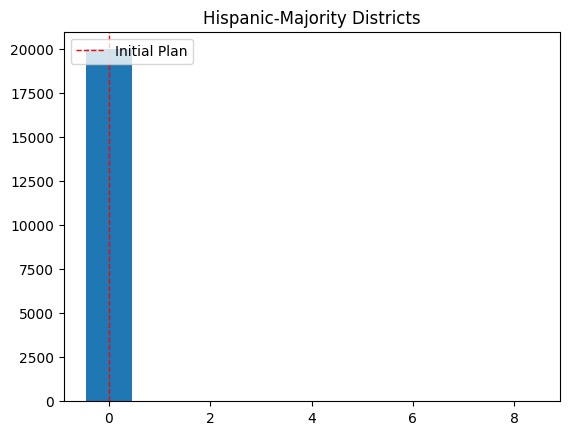

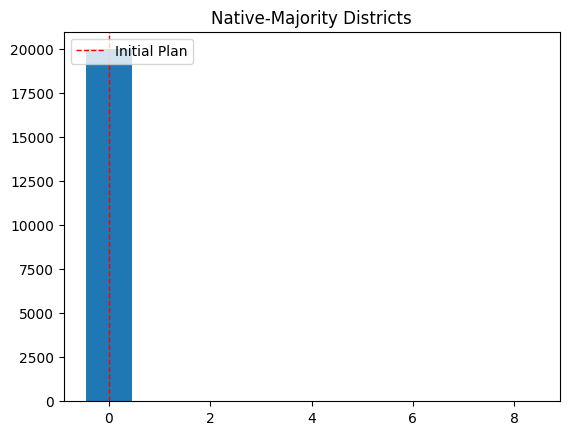

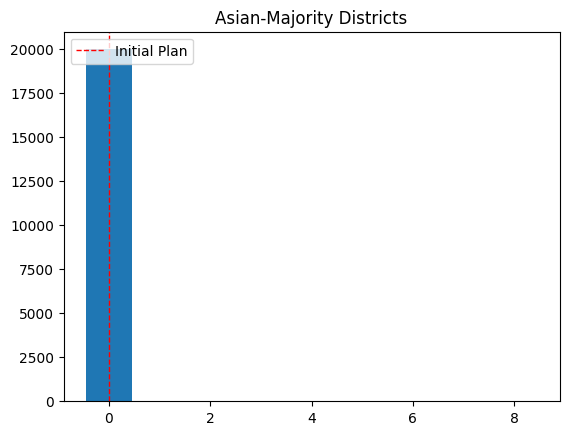

In [79]:
def create_hist(ensemble, title):
    plt.figure()
    plt.title(title)
    plt.hist(ensemble, align='left', bins=range(10), rwidth=0.9)
    plt.axvline(ensemble[0], color='r', linestyle='dashed', linewidth=1, label='Initial Plan')
    plt.legend(loc="upper left")
    plt.savefig(f'{title}.png')

create_hist(dem_pres_16_ensemble, 'Democratic-Won Districts (2016 Presidential Election)')
create_hist(dem_pres_20_ensemble, 'Democratic-Won Districts (2020 Presidential Election)')

create_hist(white_ensemble, 'White-Majority Districts')
create_hist(black_ensemble, 'Black-Majority Districts')
create_hist(hispanic_ensemble, 'Hispanic-Majority Districts')
create_hist(native_ensemble, 'Native-Majority Districts')
create_hist(asian_ensemble, 'Asian-Majority Districts')

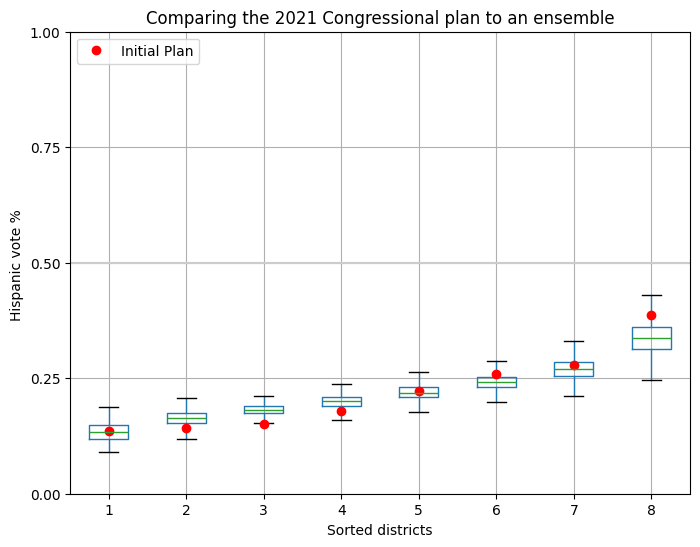

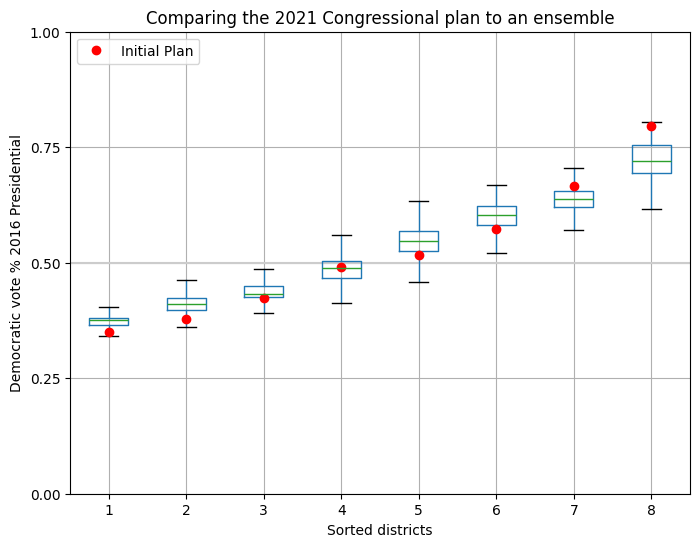

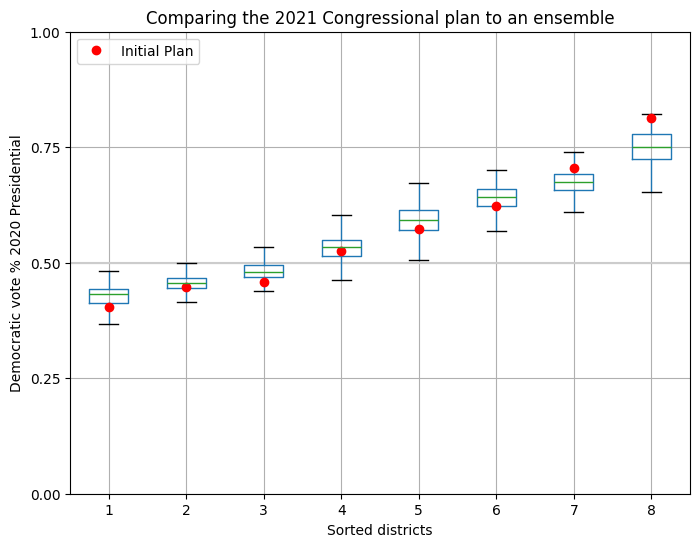

In [11]:
def create_signature_plot(data, election_name, group_name):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw 50% line
    ax.axhline(0.5, color="#cccccc")

    # Draw boxplot
    data.boxplot(ax=ax, positions=range(len(data.columns)), showfliers=False)

    # Draw initial plan's Democratic vote %s (.iloc[0] gives the first row, which corresponds to the initial plan)
    plt.plot(data.iloc[0], "ro", label='Initial Plan')
    plt.legend(loc="upper left")

    # Annotate
    ax.set_title("Comparing the 2021 Congressional plan to an ensemble")
    ax.set_ylabel(f"{group_name} vote % {election_name or ''}")
    ax.set_xlabel("Sorted districts")
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(data.columns)), range(1, len(data.columns) + 1))
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

    plt.savefig(f'Signature of Gerrymandering - {election_name or group_name}.png')
    
create_signature_plot(hispanic_df, None, "Hispanic")
create_signature_plot(pres_16_df, "2016 Presidential", 'Democratic')
create_signature_plot(pres_20_df, "2020 Presidential", 'Democratic')